In [1]:
N = ord("K") % 3 + 1;
N

1

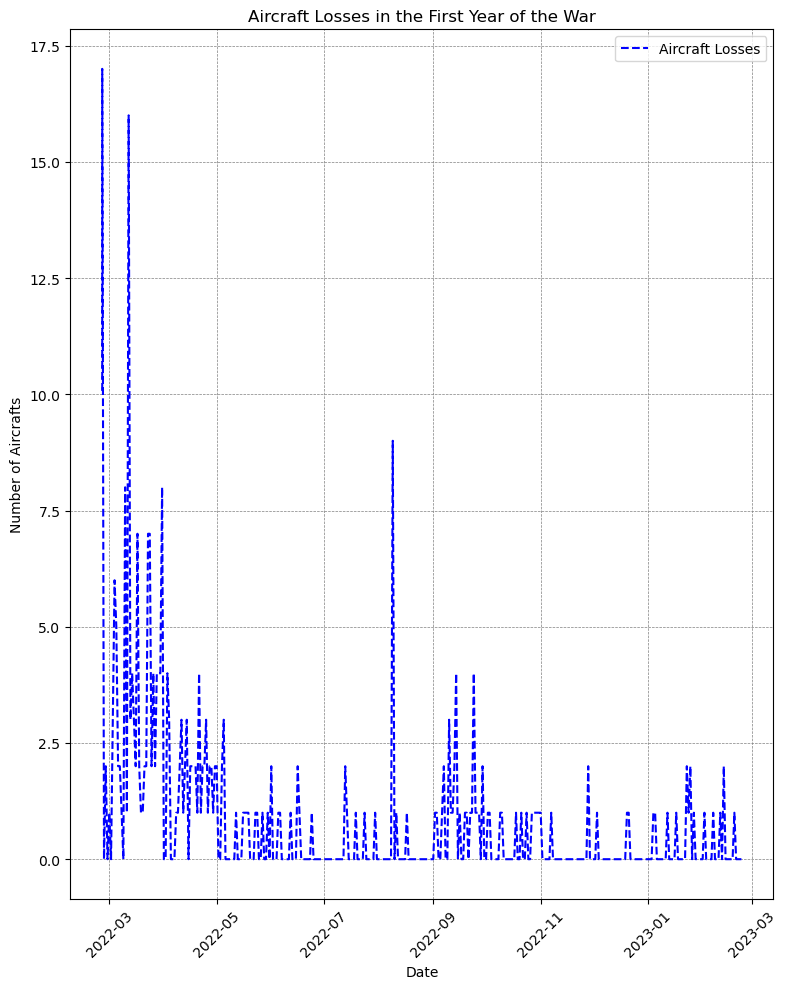

In [35]:
import csv
import numpy as np
import datetime # for task 5
import matplotlib.pyplot as plt # for task 7

def get_column_data(file, column):
    try:
        with open(file, newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            header = next(reader)
            column_data = [int(row[column_name]) for row in reader if row[column_name]]
            return np.array(column_data)
    except FileNotFoundError:
        print(f"Error: The file {file} was not found.")
    except KeyError:
        print(f"Error: The column '{column}' was not found in the CSV file.")    

def get_summer_losses(filename, date_column, losses_column):
    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        first_loss = None
        last_loss = None
        
        for row in reader:
            date = datetime.datetime.strptime(row[date_column], '%Y-%m-%d')
            if row[losses_column] and date.year == 2022 and 5 < date.month < 9:
                current_loss = int(row[losses_column])
                
                if first_loss is None:
                    first_loss = current_loss
                last_loss = current_loss
                
        if first_loss is not None and last_loss is not None:
            return first_loss - last_loss
        else:
            return None

def get_summer_losses_by_day(filename, date_column, losses_column):
    try:
        with open(filename, newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            header = next(reader)
            for row in reader:
                date = datetime.datetime.strptime(row[date_column], '%Y-%m-%d')
                if row[losses_column] and date.year == 2022 and 5 < date.month < 9:
                    print(row[date_column], row[column_name])
    except FileNotFoundError:
        print(f"Error: The file {file} was not found.")
    except KeyError:
        print(f"Error: The column '{column}' was not found in the CSV file.")

def plot_first_year_losses(filename, date_column, losses_column):
    dates = []
    losses = []

    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)

        previous_loss = None

        for row in reader:
            date = datetime.datetime.strptime(row[date_column], '%Y-%m-%d')
            if (date - datetime.datetime(2022, 2, 24)).days <= 365:
                if row[losses_column]:
                    current_loss = int(row[losses_column])
                    if previous_loss is None:
                        previous_loss = current_loss
                        continue
                    daily_loss = previous_loss - current_loss  # Calculate daily losses
                    if daily_loss < 0:  # If losses are less than 0, set to 0
                        daily_loss = 0
                    losses.append(daily_loss)
                    previous_loss = current_loss  # Update previous losses
                    dates.append(date)
        losses.append(int(row[losses_column]))
        dates.append(date)

    # Plotting
    plt.figure(figsize=(8, 10), dpi=100)  # Set size and resolution
    plt.plot(dates, losses, linestyle='--', color='blue', label='Aircraft Losses')  # Dashed line
    plt.title('Aircraft Losses in the First Year of the War')  # Title of the plot
    plt.xlabel('Date')  # X-axis label
    plt.ylabel('Number of Aircrafts')  # Y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Adding grid
    plt.legend()  # Adding legend
    plt.tight_layout()  # Automatic layout adjustment
    plt.savefig('losses_plot.png', format='png')  # Save the plot as a PNG file
    plt.show()  # Display the plot

filename = 'russia_losses_equipment.csv'
column_name = 'aircraft'
date_column = 'date'
planes_losses = get_column_data(filename, column_name)


# Task 3
daily_losses = np.abs(np.diff(planes_losses, append=0))
# Task 4
top_3_losses = np.sort(daily_losses)[-3:]
# Task 5
summer_losses = get_summer_losses(filename, date_column, column_name)
# Task 6
average_last_300_days_losses = np.mean(daily_losses[300:])
# Task 7
plot_first_year_losses(filename, date_column, column_name)